In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans as SKKMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment

In [2]:
np.random.seed(42)  # Đặt seed để tái lập kết quả

In [3]:
df =  pd.read_csv('data/iris.csv') # Đọc dữ liệu từ file CSV
df.drop(columns=['Id'], inplace=True, axis=1)  # Xóa cột Id nếu có
df.head()  # Hiển thị 5 dòng đầu tiên của DataFrame

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.drop(columns=['Species'])  # Tách dữ liệu đầu vào
y = df['Species']  # Tách nhãn
y_label = LabelEncoder().fit_transform(y)  # Chuyển đổi nhãn thành số
X, y_label

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

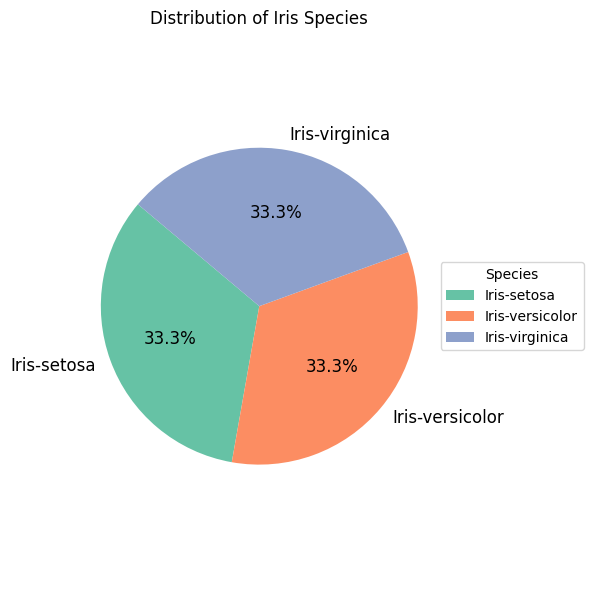

In [5]:
species_counts = y.value_counts()  

# Tạo màu cho từng nhãn (3 loại)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  

# Vẽ pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    species_counts,
    labels=species_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="black", fontsize=12)
)

# Thêm chú thích (legend) riêng
plt.legend(
    wedges,
    species_counts.index,
    title="Species",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Distribution of Iris Species")
plt.axis('equal')  # giữ hình tròn
plt.tight_layout()
plt.show()

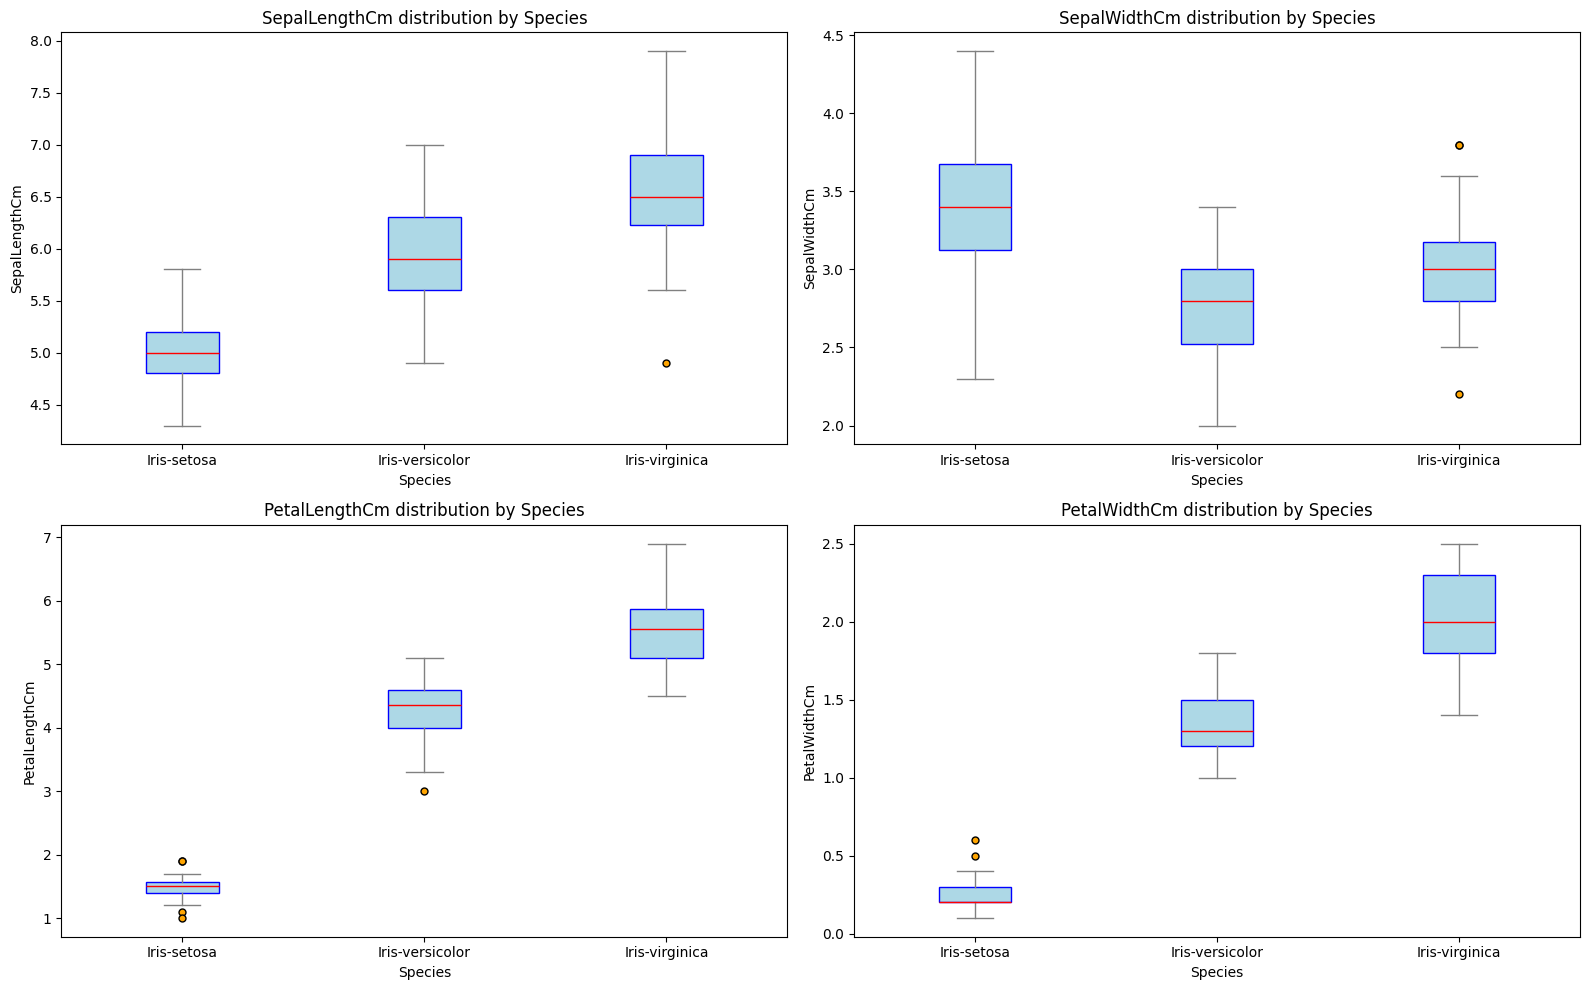

In [6]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
species = df['Species'].unique()

# Tạo subplot grid
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    
    # Tạo dữ liệu dạng list-of-lists cho từng loài
    data = [df[df['Species'] == s][feature] for s in species]
    
    # Vẽ boxplot
    plt.boxplot(data, tick_labels=species, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='gray'),
                capprops=dict(color='gray'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))

    plt.title(f'{feature} distribution by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [7]:
import numpy as np

class Kmeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters  # Số cụm cần phân
        self.centroids = None         # Danh sách các centroid sẽ được khởi tạo sau

    def init_centroidx(self, X):
        # Chọn ngẫu nhiên n_clusters điểm làm centroid ban đầu
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

    def assign_clusters(self, X):
        # Tính khoảng cách từ mỗi điểm dữ liệu đến từng centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Trả về chỉ số centroid gần nhất cho mỗi điểm
        return np.argmin(distances, axis=1)
    
    def compute_mean(self, X, points):
        # Tính lại centroid mới bằng cách lấy trung bình các điểm trong mỗi cụm
        return np.array([X[points == k].mean(axis=0) for k in range(self.n_clusters)])
    
    def fit(self, X, max_iter=100):
        # Khởi tạo centroid ban đầu
        self.init_centroidx(X)

        for _ in range(max_iter):
            # Gán nhãn cụm cho từng điểm
            points = self.assign_clusters(X)

            # Tính lại centroid
            new_centroids = self.compute_mean(X, points)

            # Nếu centroid không thay đổi nữa thì dừng lại (hội tụ)
            if np.all(self.centroids == new_centroids):
                break

            # Cập nhật centroid
            self.centroids = new_centroids

        return self.centroids, points


In [8]:
X = X.values 

In [9]:
kmeans = Kmeans(n_clusters=3)
centroids, points = kmeans.fit(X)

In [10]:
print(centroids, '\n', points)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]] 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


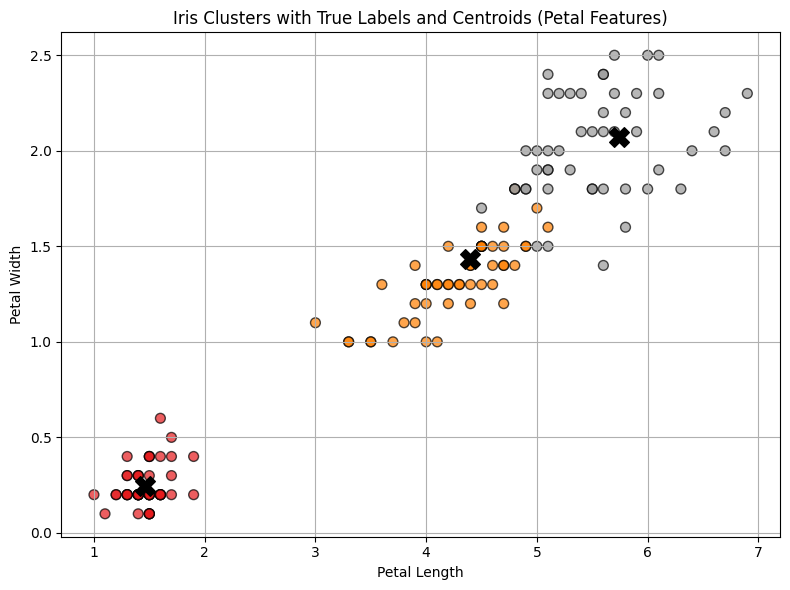

In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y) 
# Vẽ scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 2], X[:, 3],  c=y_encoded, cmap='Set1', s=50, edgecolor='k', alpha=0.7)
plt.scatter(centroids[:, 2], centroids[:, 3], c='black', s=200, marker='X', label='Centroids')

# Gắn label
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Clusters with True Labels and Centroids (Petal Features)")


plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
def calculate_kmeans_accuracy(y_true, y_pred):
    if y_true.dtype == 'O':
        y_true = LabelEncoder().fit_transform(y_true)

    D = max(y_pred.max(), y_true.max()) + 1
    confusion_matrix = np.zeros((D, D), dtype=np.int64)
    for i in range(len(y_true)):
        confusion_matrix[y_pred[i], y_true[i]] += 1

    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    mapping = dict(zip(row_ind, col_ind))
    y_pred_mapped = np.array([mapping[label] for label in y_pred])

    return accuracy_score(y_true, y_pred_mapped)

In [13]:
kmeans_sklearn = SKKMeans(n_clusters=3, n_init=10, random_state=42)
y_pred_sklearn = kmeans_sklearn.fit_predict(X)

In [14]:
acc_scratch = calculate_kmeans_accuracy(y, points)
print(f"KMeans Scratch Accuracy: {acc_scratch*100:.2f}%")

acc_sklearn = calculate_kmeans_accuracy(y, y_pred_sklearn)
print(f"KMeans scikit-learn Accuracy: {acc_sklearn*100:.2f}%")

KMeans Scratch Accuracy: 89.33%
KMeans scikit-learn Accuracy: 89.33%
